In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [12]:
data = pd.read_csv('../out/study5_n.csv')
print("shape: ", data.shape)
POS = data["pos"].unique()
CONF = data["conf"].unique()
data.head()

shape:  (25, 16)


,trial,FNR,FPR,TNR,TPR,accuracy,f05,f1,f2,mcc,precision,recall,sensitivity,specificity,pos,conf
0,pos_1-conf_1,0.000000,0.998789,0.001211,1.000000,0.100664,0.121547,0.181155,0.355657,0.013184,0.099683,1.000000,1.000000,0.001211,1,1
1,pos_1-conf_3,0.011383,0.929636,0.070364,0.988617,0.161800,0.128095,0.190056,0.368309,0.071716,0.105228,0.988617,0.988617,0.070364,1,3
2,pos_1-conf_5,0.106929,0.657114,0.342886,0.893071,0.397674,0.157503,0.227723,0.411230,0.151390,0.130651,0.893071,0.893071,0.342886,1,5
3,pos_1-conf_7,0.416051,0.255851,0.744149,0.583949,0.728202,0.231797,0.299140,0.422315,0.216699,0.201590,0.583949,0.583949,0.744149,1,7
4,pos_1-conf_9,0.884658,0.015689,0.984311,0.115342,0.897794,0.281142,0.182218,0.135139,0.187803,0.447710,0.115342,0.115342,0.984311,1,9


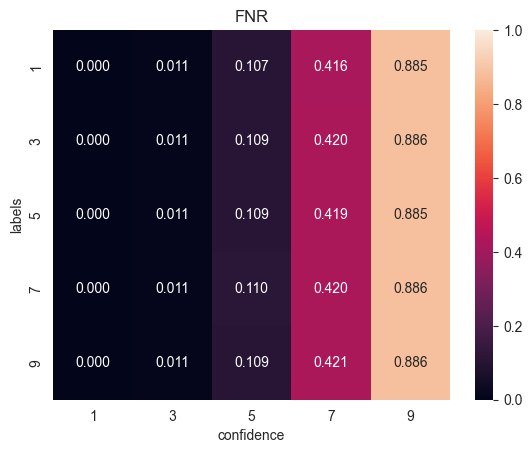

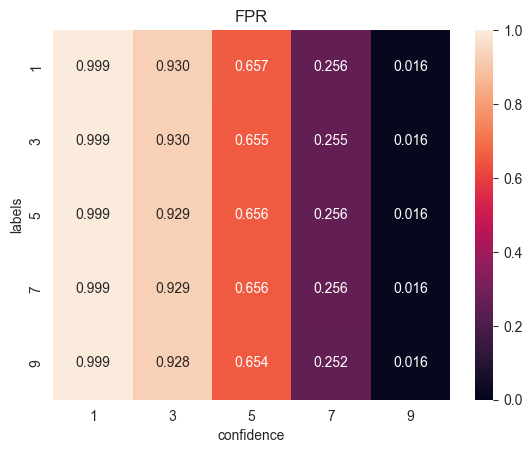

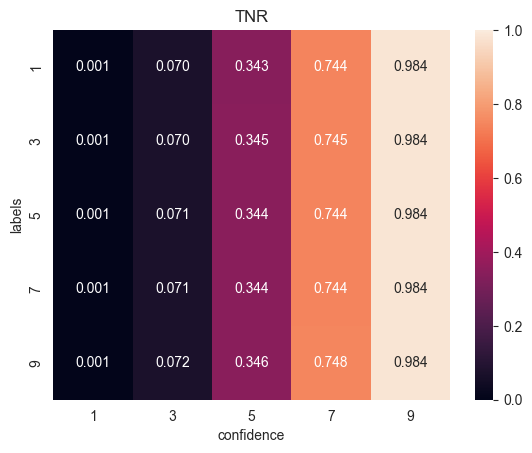

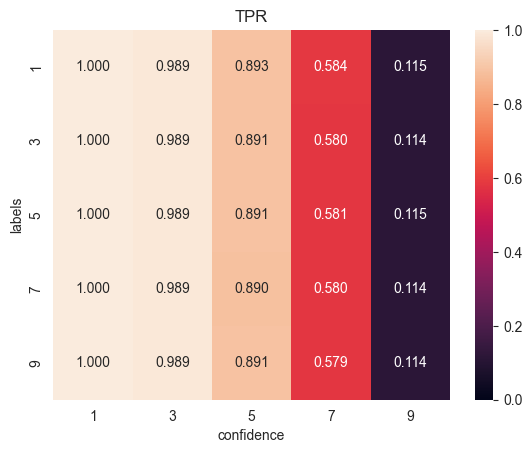

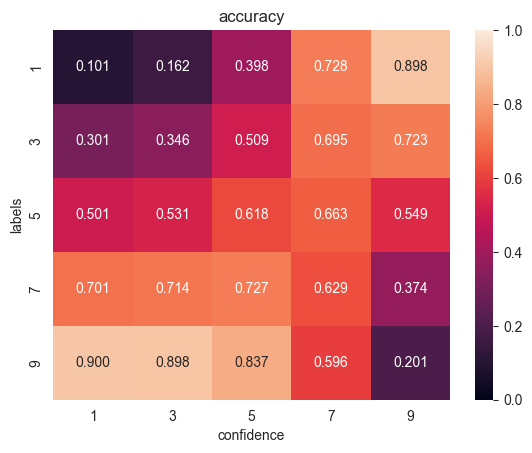

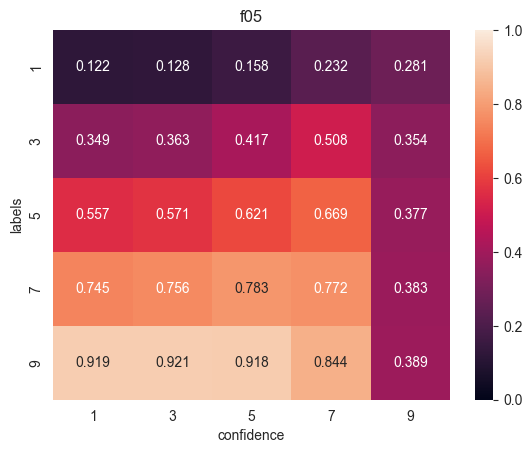

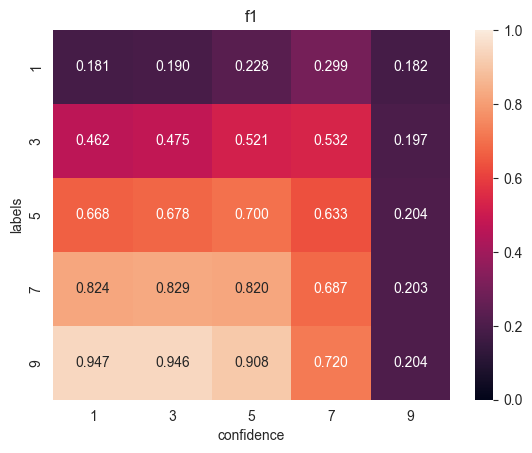

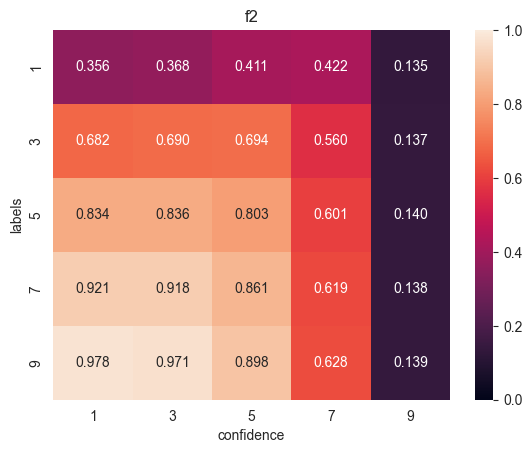

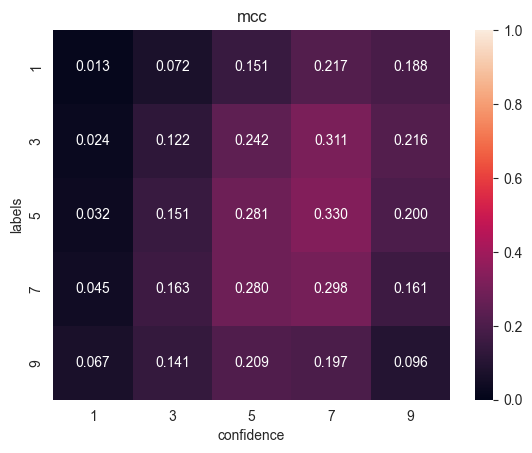

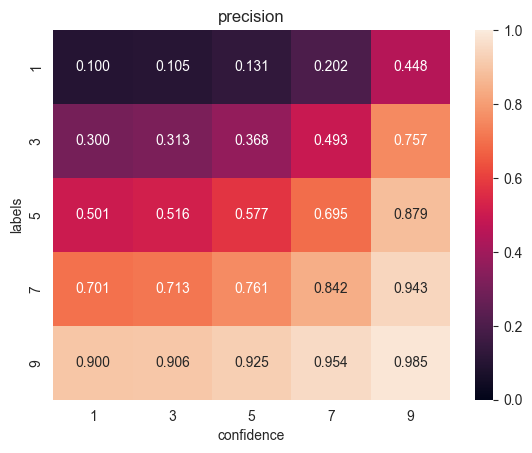

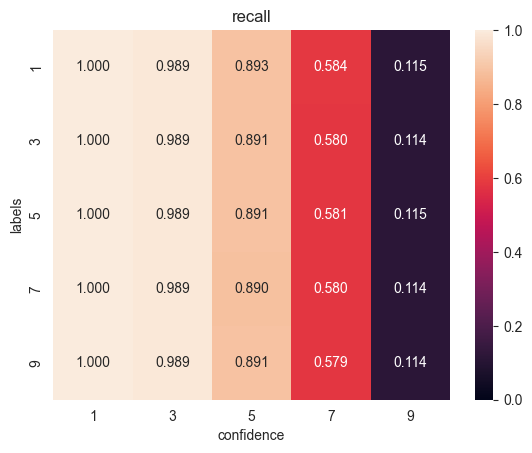

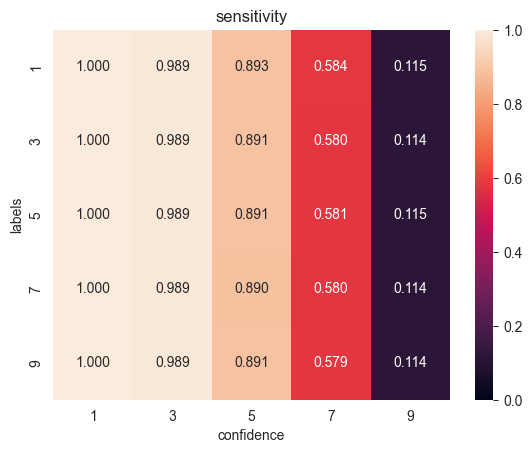

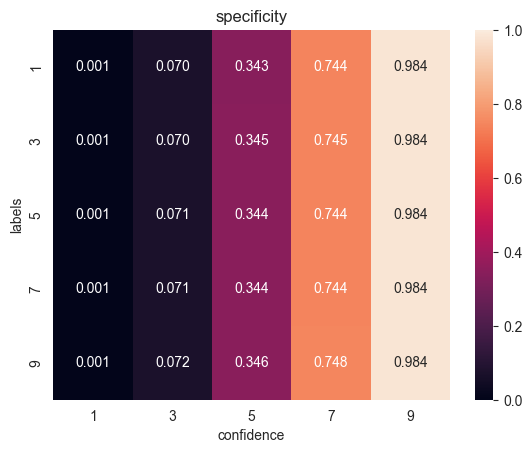

In [13]:
# plot heatmap for each column
for i in range(1, 14):
    title = data.columns[i]
    sns.heatmap(data.iloc[:, i].values.reshape(len(POS), len(CONF)), annot=True, 
                fmt=".3f", vmin=0, vmax=1, xticklabels=CONF, yticklabels=POS)
    plt.title(title)
    plt.xlabel("confidence")
    plt.ylabel("labels")
    plt.savefig(f'../out/study5_{title}.png', dpi=300)
    plt.show()

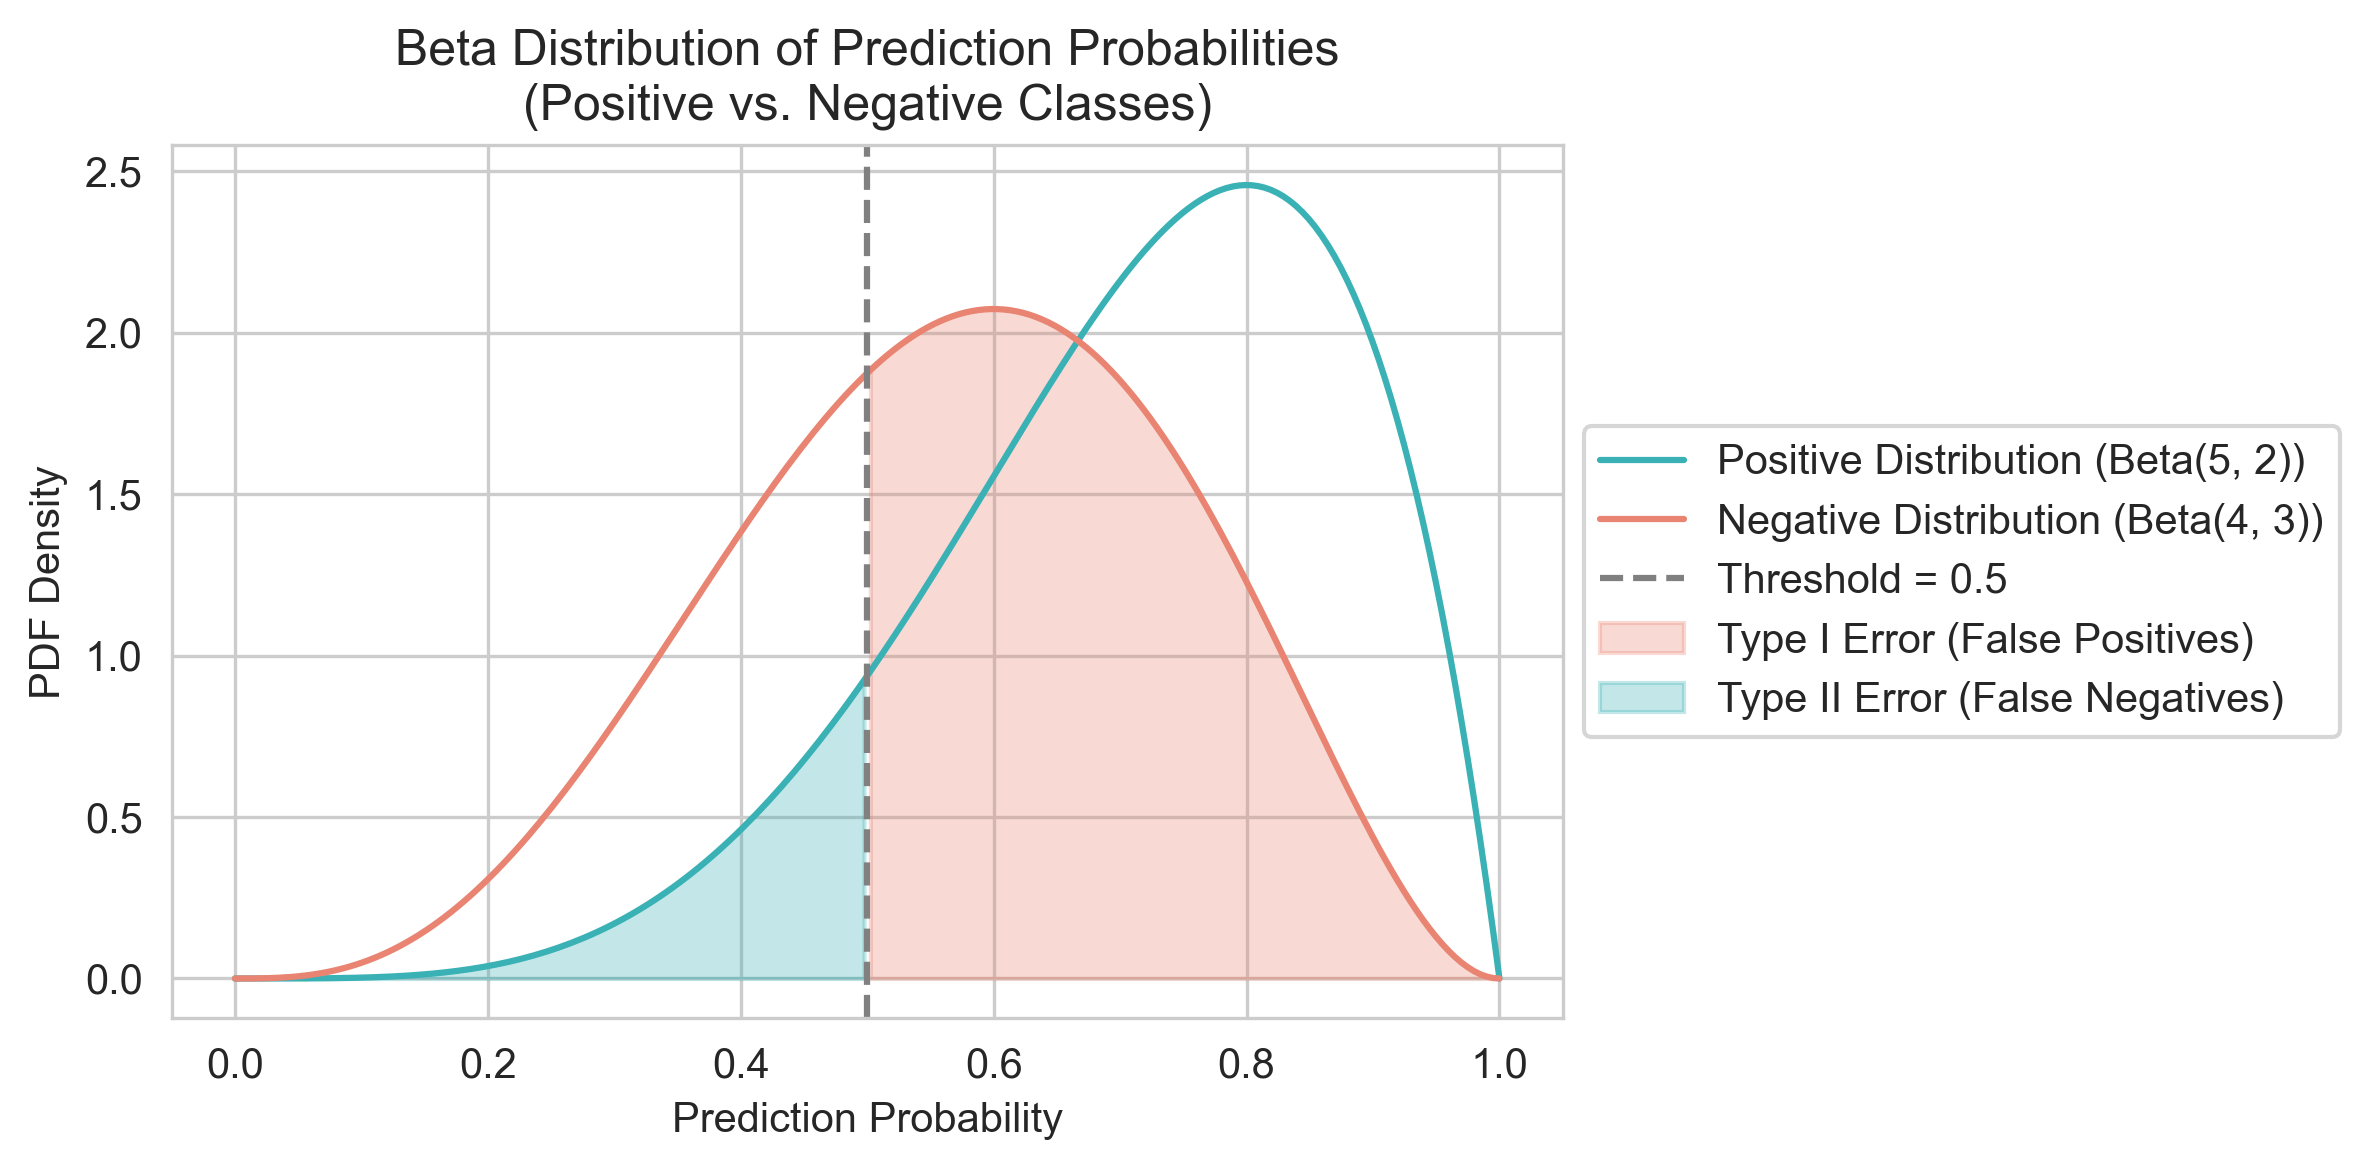

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta

palette = ["#39B1B5", "#E88471"]

# --- 1. Define Beta parameters ---
a_pos, b_pos = 5, 2   # Positive distribution ~ Beta(5, 2)
a_neg, b_neg = 4, 3   # Negative distribution ~ Beta(2, 5)

# --- 2. Create an x-axis for the PDF (0 to 1) ---
x = np.linspace(0, 1, 200)

# --- 3. Compute PDFs for positive and negative classes ---
pdf_pos = beta.pdf(x, a_pos, b_pos)
pdf_neg = beta.pdf(x, a_neg, b_neg)

# --- 4. Confidence threshold ---
threshold = 0.5

# --- 5. Plot the PDFs ---
sns.set_style('whitegrid')
plt.figure(figsize=(8, 4), dpi=300)
sns.lineplot(x=x, y=pdf_pos, label='Positive Distribution (Beta(5, 2))', color=palette[0])
sns.lineplot(x=x, y=pdf_neg, label='Negative Distribution (Beta(4, 3))', color=palette[1])

# --- 6. Draw a vertical line at the threshold ---
plt.axvline(threshold, color='grey', linestyle='--', label=f'Threshold = {threshold}')

# --- 7. Shade Type I and Type II error regions ---
mask = x >= threshold
plt.fill_between(
    x[mask], 
    pdf_neg[mask], 
    color=palette[1], alpha=0.3,
    label='Type I Error (False Positives)'
)
plt.fill_between(
    x[~mask], 
    pdf_pos[~mask], 
    color=palette[0], alpha=0.3,
    label='Type II Error (False Negatives)'
)

# --- 8. Cosmetic improvements ---
plt.title('Beta Distribution of Prediction Probabilities\n(Positive vs. Negative Classes)')
plt.xlabel('Prediction Probability')
plt.ylabel('PDF Density')
# leave the legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('../out/study5_PDF.png', dpi=300)
plt.show()

              sum_sq    df           F        PR(>F)
C(HT)      97.067315   1.0  116.436917  2.656431e-18
C(FS)     261.536142   1.0  313.725193  3.679415e-32
Residual   80.863783  97.0         NaN           NaN


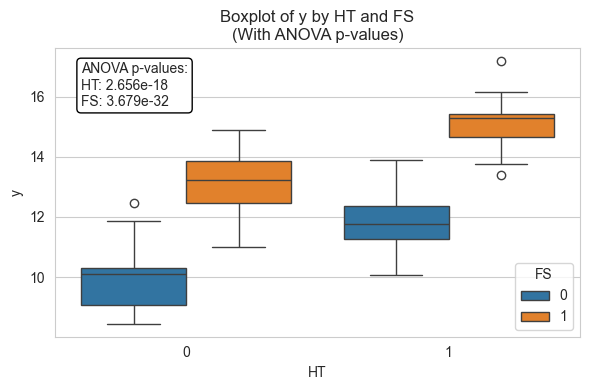

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
import numpy as np
import pandas as pd

# Reproducibility
np.random.seed(42)

# Number of samples
N = 100

# Mock binary factors
HT = np.random.choice([0, 1], size=N)
FS = np.random.choice([0, 1], size=N)

# Create a numeric outcome y that depends on HT and FS + some random noise
# E.g., y = 10 + 2*HT + 3*FS + normal noise
y = 10 + 2*HT + 3*FS + np.random.normal(loc=0, scale=1, size=N)

# Build DataFrame
df = pd.DataFrame({
    'y':  y,
    'HT': HT,
    'FS': FS
})

df.head()
# Sample dataset
# Suppose df has columns: ['y', 'HT', 'FS'],
# where HT and FS are binary (0 or 1), and y is the numeric outcome
# e.g. df = pd.DataFrame({'y': [...], 'HT': [...], 'FS': [...]})

# 1. Fit an OLS model for ANOVA
#    Model formula: y ~ 1 + HT + FS (main effects only)
#    If you also want the interaction, include + HT:FS
model = smf.ols("y ~ C(HT) + C(FS)", data=df).fit()
anova_results = anova_lm(model, typ=2)  # type=2 for main-effects ANOVA
print(anova_results)

# Extract p-values for easy reference
pHT = anova_results.loc['C(HT)', 'PR(>F)']
pFS = anova_results.loc['C(FS)', 'PR(>F)']

# If you included interaction in your model (y ~ C(HT) + C(FS) + C(HT):C(FS))
# then you could also extract p-value for the interaction:
# pHTFS = anova_results.loc['C(HT):C(FS)', 'PR(>F)']

# 2. Plot the boxplot using Seaborn
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(x='HT', hue='FS', y='y', data=df, ax=ax)

# 3. Annotate the ANOVA results on the figure
#    For example, place text with p-values in the top-left corner inside the axes
annotation_text = (f"ANOVA p-values:\n"
                   f"HT: {pHT:.3e}\n"
                   f"FS: {pFS:.3e}")
ax.text(0.05, 0.95, annotation_text,
        transform=ax.transAxes, va='top', ha='left',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1))

# Optional: If you have the interaction term:
# annotation_text += f"\nHT:FS: {pHTFS:.3e}"

ax.set_title("Boxplot of y by HT and FS\n(With ANOVA p-values)")
plt.tight_layout()
plt.show()